In [1]:
import numpy as np
import collections as col
from wingstructure import structure

# Define materials

In [2]:
Material = col.namedtuple('Material', ['ρ'])

fabric = Material(ρ=0.3e3)
foam = Material(ρ=0.18e3)

# Define structure

## import dat file

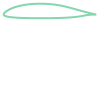

In [3]:
# load airfoil.dat file
coords = np.loadtxt('airfoils/ah93157.dat', skiprows=1)*1.2

# initialize base for section analysis
secbase = structure.SectionBase(coords)
secbase

## add structure elements

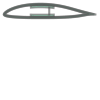

In [4]:
# create an outer layer from fabric with thickness 0.003 m
out = structure.Layer(secbase, fabric, 3e-3)
# create sandwich core from foam, thickness 0.01
core = structure.Layer(out, foam, 1e-2)
# create another fabric layer
inner = structure.Layer(core, fabric, 3e-3)
# create spar
spar = structure.ISpar(inner, {'flange': fabric, 'web': fabric}, 0.5, 0.300, 3e-2, 0.8, 1e-3)
spar

In [5]:
core.children

In [6]:
with open('section.svg','w') as afile:
    afile.write(spar._repr_svg_())

# Analyse mass

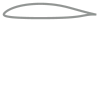

In [10]:
out.geometry

In [22]:
a = np.random.rand(2,2)
a

array([[0.78826818, 0.28965154],
       [0.52012893, 0.00280799]])

In [24]:
np.roll(a, 1, axis=0)

array([[0.52012893, 0.00280799],
       [0.78826818, 0.28965154]])

In [33]:
outline = np.array(out.geometry.exterior.coords)

In [40]:
def calcarea(outline):
    
    x_i, y_i = outline.T
    x_ip1, y_ip1 = np.roll(outline.T, 1, axis=1)
    
    A = 0.5 * np.sum(y_ip1*x_i-y_i*x_ip1)
    
    return A

def staticmoments(outline):
    
    x_i, y_i = outline.T
    x_ip1, y_ip1 = np.roll(outline.T, 1, axis=1)
    
    S_x = 1/6 * np.sum((y_i+y_ip1)*(y_ip1*x_i-y_i*x_ip1))
    S_y = 1/6 * np.sum((x_i+x_ip1)*(y_ip1*x_i-y_i*x_ip1))
    
    return S_x, S_y

def inertiamoments(outline):
    
    x_i, y_i = outline.T
    x_ip1, y_ip1 = np.roll(outline.T, 1, axis=1)
    
    I_xx = 1/12 * np.sum((y_ip1**2 + (y_i+y_ip1)*y_i)\
                         +(y_ip1*x_i-y_i*x_ip1))
    I_yy = 1/12 * np.sum((x_ip1**2 + (x_i+x_ip1)*x_i)\
                         +(y_ip1*x_i-y_i*x_ip1))
    I_xy = 1/12 * np.sum(0.5*x_ip1**2*y_i**2-0.5*x_i**2*y_ip1**2\
                          -(y_ip1*x_i-y_i*x_ip1)*(x_i*y_i+x_ip1*y_ip1))
    
    return I_xx, I_yy, I_xy

def neutralcenter(outline):
    
    area_ = calcarea(outline)
    
    S_x, S_y = staticmoments(outline)
    
    x_nc = S_y/area_
    y_nc = S_x/area_
    
    return x_nc, y_nc

In [41]:
staticmoment(outline)

(0.0052151819206383366, 0.08084714611940208)

In [42]:
inertiamoments(outline)

(0.182573420256, 13.593799030187999, -0.0026157636672827674)

In [43]:
neutralcenter(outline)

(0.5239723005693785, 0.03379971959441762)

In [7]:
massana = structure.MassAnalysis(spar)
massana.massproperties

(array([0.54128247, 0.0346968 ]), 13.748299126744147)